# Load Data

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import random
import os
import numpy as np

In [2]:
anno_path_box = "./dataset/Annotations/daySequence1/frameAnnotationsBOX.csv"
anno_path_bulb = "./dataset/Annotations/daySequence1/frameAnnotationsBULB.csv"
frames_path = "./dataset/daySequence1/frames/"

images = []
labels = []
with open(anno_path_box) as fp:  
    line = fp.readline()
    line = fp.readline() # Skip header line with descriptions

    while line:
        anno_file_path = (line.strip()).split(";")
        anno_file_id = anno_file_path[0].split("/")[1]
        
        file_name = os.path.join(os.path.join(frames_path, anno_file_id))
        
        anno_left = int(anno_file_path[2])
        anno_top = int(anno_file_path[3])
        anno_right = int(anno_file_path[4])
        anno_bot = int(anno_file_path[5])
        
        file = cv2.imread(file_name)
        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        crop = file[anno_top:anno_bot, anno_left:anno_right]
        resized = cv2.resize(crop, (32, 64))
        
        images.append(resized)
        labels.append(
            {'go': 0,
             'goLeft': 0,
             'goForward': 0,
             'warning': 1,
             'warningLeft': 1,
             'stop': 2,
             'stopLeft': 2
            }[anno_file_path[1]]
        )
        
        line = fp.readline()

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.33, random_state=42)

In [4]:
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 5293
Number of testing examples = 2607
Image data shape = (64, 32, 3)
Number of classes = 3


# Train NN

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers
from keras.models import load_model

In [6]:
categorical_labels = to_categorical(y_train)

In [16]:
num_classes = 3
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
#Dropout(0.8)
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
#model.add(MaxPooling2D(2,2))
Dropout(0.5)
model.add(Flatten())

#model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [18]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [19]:
model.fit(X_train, categorical_labels, batch_size=64, epochs=100, verbose=True, validation_split=0.1, shuffle=True)

Train on 4763 samples, validate on 530 samples
Epoch 1/100
4763/4763 [==============================] - 1s 283us/step - loss: 2.9407 - acc: 0.8511 - val_loss: 2.3516 - val_acc: 0.8887
Epoch 2/100
4763/4763 [==============================] - 1s 233us/step - loss: 1.3578 - acc: 0.9425 - val_loss: 0.5656 - val_acc: 0.9566
Epoch 3/100
4763/4763 [==============================] - 1s 232us/step - loss: 0.4689 - acc: 0.9954 - val_loss: 0.4202 - val_acc: 0.9981
Epoch 4/100
4763/4763 [==============================] - 1s 233us/step - loss: 0.3882 - acc: 0.9994 - val_loss: 0.3577 - val_acc: 1.0000
Epoch 5/100
4763/4763 [==============================] - 1s 232us/step - loss: 0.3383 - acc: 0.9981 - val_loss: 0.3127 - val_acc: 0.9981
Epoch 6/100
4763/4763 [==============================] - 1s 231us/step - loss: 0.2937 - acc: 0.9981 - val_loss: 0.2715 - val_acc: 1.0000
Epoch 7/100
4763/4763 [==============================] - 1s 232us/step - loss: 0.2529 - acc: 0.9998 - val_loss: 0.2349 - val_acc: 1

4763/4763 [==============================] - 1s 230us/step - loss: 0.0412 - acc: 1.0000 - val_loss: 0.0397 - val_acc: 1.0000
Epoch 61/100
4763/4763 [==============================] - 1s 231us/step - loss: 0.0382 - acc: 1.0000 - val_loss: 0.0369 - val_acc: 1.0000
Epoch 62/100
4763/4763 [==============================] - 1s 230us/step - loss: 0.0356 - acc: 1.0000 - val_loss: 0.0343 - val_acc: 1.0000
Epoch 63/100
4763/4763 [==============================] - 1s 230us/step - loss: 0.0330 - acc: 1.0000 - val_loss: 0.0319 - val_acc: 1.0000
Epoch 64/100
4763/4763 [==============================] - 1s 231us/step - loss: 0.0307 - acc: 1.0000 - val_loss: 0.0296 - val_acc: 1.0000
Epoch 65/100
4763/4763 [==============================] - 1s 230us/step - loss: 0.0285 - acc: 1.0000 - val_loss: 0.0276 - val_acc: 1.0000
Epoch 66/100
4763/4763 [==============================] - 1s 232us/step - loss: 0.0265 - acc: 1.0000 - val_loss: 0.0257 - val_acc: 1.0000
Epoch 67/100
4763/4763 [=======================

In [20]:
score = model.evaluate(X_train, categorical_labels, verbose=0)
print(model.metrics_names)
print(score)

In [24]:
import h5py
model.save('traffic_light_classifier.h5')

In [27]:
loaded_model = load_model('traffic_light_classifier.h5')

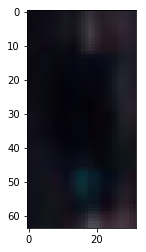

array([[ 0.,  1.,  0.]], dtype=float32)

In [60]:
img = random.choice(images)
plt.imshow(img)
plt.show()

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

loaded_model.predict(x)